# 1- Import Packages and Classes 

In [149]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import os
import re

# 2- Read DataSet

In [150]:
df = pd.read_csv('hour.csv')
df.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# 3- Exploratry Data Analysis (EDA)

In [151]:
df.shape

(17379, 17)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weather     17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  demand      17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [153]:
correlation = df.corr()

In [154]:
correlation['demand'].sort_values(ascending=False)

demand        1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hour          0.394071
index         0.278379
year          0.250495
season        0.178056
month         0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weather      -0.142426
humidity     -0.322911
Name: demand, dtype: float64

- after data uderstanding we wil remove `index` , `casual`, `registered` because this columns are not important

In [155]:
df.drop(columns=['index', 'casual', 'registered'], inplace=True)

In [156]:
df.describe()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


### check nulls in data 

In [157]:
df.isnull().sum()

date          0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

- no nulls in data :)

### chek duplicates in data 

In [158]:
df.duplicated().sum()

0

- no duplicates in data :)

### check distribution of data 

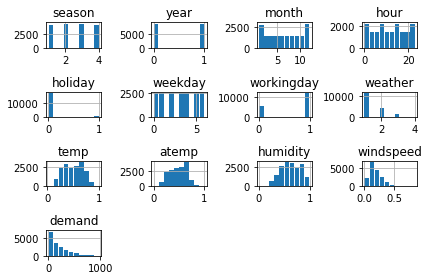

In [159]:
df.hist(rwidth=0.9)
plt.tight_layout()

- data is normaly distribution but `label >> deman` is skewed

### check relationship between contionous data > `temp`, `atemp`, `humidity`, `windspeed` with `label`

Text(0.5, 1.0, 'windspeed with demand')

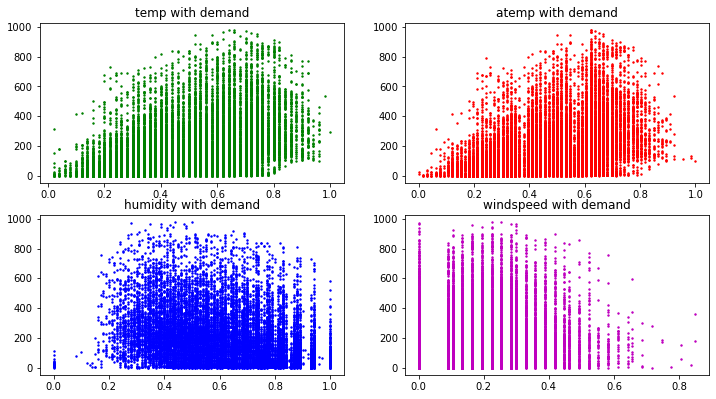

In [160]:
plt.figure(figsize=(12,10))
plt.tight_layout()

plt.subplot(3, 2, 1)
plt.scatter(df['temp'], df['demand'], s=2, c='g')
plt.title('temp with demand')

plt.subplot(3, 2, 2)
plt.scatter(df['atemp'], df['demand'], s=2, c='r')
plt.title('atemp with demand')

plt.subplot(3, 2, 3)
plt.scatter(df['humidity'], df['demand'], s=2, c='b')
plt.title('humidity with demand')


plt.subplot(3, 2, 4)
plt.scatter(df['windspeed'], df['demand'], s=2, c='m')
plt.title('windspeed with demand')

# plt.subplot(3, 2, 5)
# plt.scatter(df['casual'], df['demand'], s=2, c='y')
# plt.title('casual with demand')

# plt.subplot(3, 2, 6)
# plt.scatter(df['registered'], df['demand'], s=2, c='y')
# plt.title('registered with demand')

- we can discover the Temprature affect on demand and `atemp` so we can remove `atemp` column because there is no difference between them 

- `humidtiy` wasn't affect on demand and we will drop it  

- when `windspeed` increases demand was dereases 

### check Average of Categorical data With `demand`

In [161]:
avg_season = df.groupby('holiday')['demand'].median()
avg_season

holiday
0    144.0
1     97.0
Name: demand, dtype: float64

In [162]:
categorical = df['holiday'].unique()
categorical

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'average demand per month')

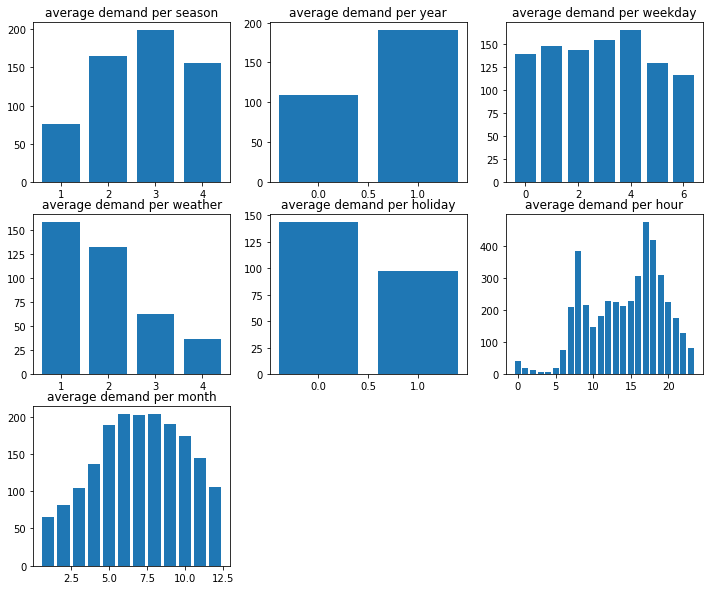

In [163]:
plt.figure(figsize=(12,10))
plt.tight_layout()

plt.subplot(3,3,1)
categorical = df['season'].unique()
avg_season = df.groupby('season')['demand'].median()
plt.bar(categorical, avg_season)
plt.title('average demand per season')

plt.subplot(3,3,2)
categorical = df['year'].unique()
avg_season = df.groupby('year')['demand'].median()
plt.bar(categorical, avg_season)
plt.title('average demand per year')

plt.subplot(3,3,3)
categorical = df['weekday'].unique()
avg_season = df.groupby('weekday')['demand'].median()
plt.bar(categorical, avg_season)
plt.title('average demand per weekday')

plt.subplot(3,3,4)
categorical = df['weather'].unique()
avg_season = df.groupby('weather')['demand'].median()
plt.bar(categorical, avg_season)
plt.title('average demand per weather')

plt.subplot(3,3,5)
categorical = df['holiday'].unique()
avg_season = df.groupby('holiday')['demand'].median()
plt.bar(categorical, avg_season)
plt.title('average demand per holiday')

plt.subplot(3,3,6)
categorical = df['hour'].unique()
avg_season = df.groupby('hour')['demand'].median()
plt.bar(categorical, avg_season)
plt.title('average demand per hour')

plt.subplot(3,3,7)
categorical = df['month'].unique()
avg_season = df.groupby('month')['demand'].median()
plt.bar(categorical, avg_season)
plt.title('average demand per month')

- in `season` (summer([3])) is the most avg for demand 

- in `weekday` ([4]) is the most avg for demand 

- in `year` ([1(2011)]) is the most avg for demand

- in `weather` ([1)]) is the most avg for demand

- in `hour` we will discover in 5:00 AM the demand increases because the people are going to work by bike  

# 4- PreProcessing

### 1- check outliers in data

In [164]:
df.describe()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


- we can discover outliers in label `demand`

In [165]:
df['demand'].quantile([.05 , .15, .50, .95, .99])

0.05      5.00
0.15     16.00
0.50    142.00
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

- we can discover from this function 99% of data is (782) and then outliers , so we can fix it by Log

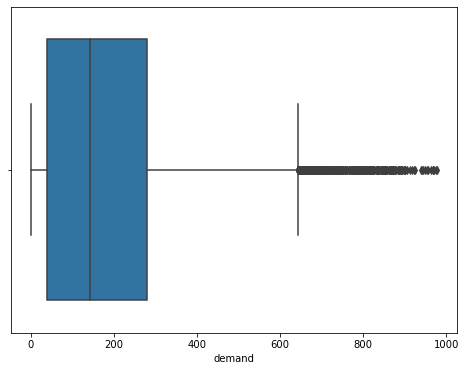

In [166]:
plt.figure(figsize=(8,6))
sns.boxplot(x='demand', data=df)
plt.show()

In [167]:
df1 = np.log(df['demand'])

<AxesSubplot:>

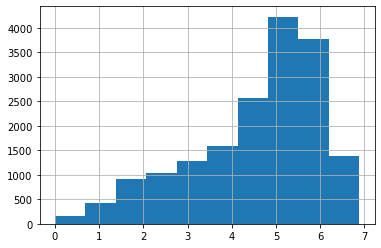

In [168]:
df1.hist()

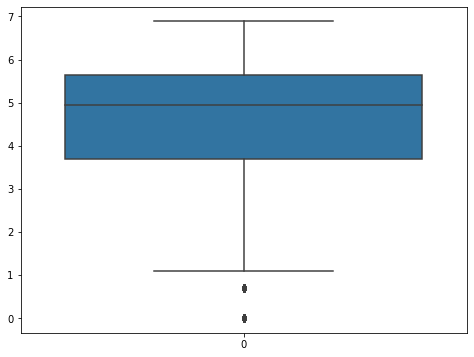

In [169]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df1)
plt.show()

In [170]:
df['demand'] = np.log(df['demand'])

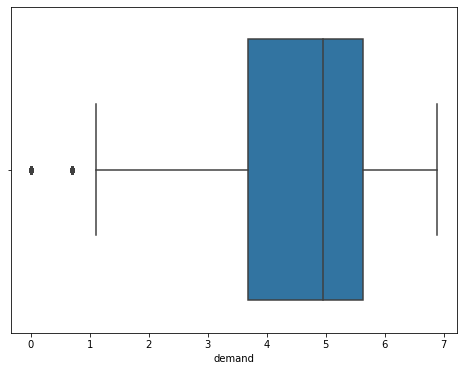

In [171]:
plt.figure(figsize=(8,6))
sns.boxplot(x='demand', data=df)
plt.show()

### check dtypes 

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        17379 non-null  object 
 1   season      17379 non-null  int64  
 2   year        17379 non-null  int64  
 3   month       17379 non-null  int64  
 4   hour        17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weather     17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  humidity    17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  demand      17379 non-null  float64
dtypes: float64(5), int64(8), object(1)
memory usage: 1.9+ MB


- change uniqe col to category 

In [173]:
df['season'] = df['season'].astype('category')

In [174]:
df['holiday'] = df['holiday'].astype('category')

In [175]:
df['weather'] = df['weather'].astype('category')

In [176]:
df['month'] = df['month'].astype('category')

In [177]:
df['hour'] = df['hour'].astype('category')

### discover important cols with Label and encoding

In [178]:
correlation = df.corr()

In [179]:
correlation['demand'].sort_values(ascending=False)

demand        1.000000
temp          0.385724
atemp         0.382619
year          0.165782
windspeed     0.113496
weekday       0.029637
workingday    0.001463
humidity     -0.335751
Name: demand, dtype: float64

drop `atemp` , `weekday`, `workingday` and `humidity`

In [180]:
df.drop(columns=['atemp', 'weekday', 'workingday', 'humidity', 'date'], inplace=True)

In [181]:
df1 = pd.get_dummies(df, drop_first=True)

In [182]:
df['demand'].value_counts()

1.609438    260
1.791759    236
1.386294    231
1.098612    224
0.693147    208
           ... 
6.816736      1
6.741701      1
6.655440      1
6.493754      1
6.455199      1
Name: demand, Length: 869, dtype: int64

In [183]:
df1.columns

Index(['year', 'temp', 'windspeed', 'demand', 'season_2', 'season_3',
       'season_4', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'holiday_1', 'weather_2',
       'weather_3', 'weather_4'],
      dtype='object')

In [184]:
df1.shape

(17379, 45)

# 5- Linear Regression Model

In [185]:
X = df1.drop(columns=['demand'])
y = df1['demand']

### train test split

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024) 

### import Model

In [187]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Evaluation

In [188]:
r_seq = regressor.score(X_train, y_train)
r_seq

0.8222972258858541

In [189]:
y_pred = regressor.predict(X_test)
y_pred

array([6.34265682, 4.88120442, 5.18011337, ..., 5.34327888, 6.15193192,
       3.94625276])

In [190]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coefficient of determination:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.47385037268353203
Mean Squared Error: 0.4056747017374622
Root Mean Squared Error 0.6369259782246773
Coefficient of determination: 0.8166882822177502


In [191]:
from sklearn.feature_selection import RFE

linreg = LinearRegression()

rfe = RFE(linreg, step =  40)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[False  True False False False False False False False False False False
 False False False False False False  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False False False  True False]
[2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 1 2]


In [192]:
X_train.columns[rfe.support_]

Index(['temp', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'weather_3'],
      dtype='object')

In [193]:
cols = X_train.columns[rfe.support_]
X=X_train[cols]
y=y_train

In [194]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [195]:
y_pred = linreg.predict(X_test)
print('Accuracy of linear regression on test set: {:.2f}'.format(linreg.score(X_test, y_test)))

Accuracy of linear regression on test set: 0.76


- feature selection accuracy not good for this data 